# A 1D diffusion model

Here we develop a one-dimensional model of diffusion.
It assumes a constant diffusivity.
It useas a regular grid.
It has fixed boundary conditions.

The diffusion equation:

$$ \frac{\partial C}{\partial t} = D\frac{\partial^2 C}{\partial x^2} $$

The discretized version of the diffusion equation that we'll solve with our model:

$$ C^{t+1}_x = C^t_x + {D \Delta t \over \Delta x^2} (C^t_{x+1} - 2C^t_x + C^t_{x-1}) $$

This is the explicit FTCS scheme as described in Slingerland and Kump (2011). (Or see Wikipedia.)

We will use two libraries, Numpy (for arrays)
and Matplotlib (for plotting)
that aren't a part of the base Python distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Set two fixed model parameters, the diffusivity and the size of the model domain.

In [23]:
D = 100 # diffusivity
Lx = 300 # domain size

Next, set up the model grid using a NumPy array.

In [10]:
dx = 0.5
x = np.arange(start=0, stop=Lx, step=dx)
nx = len(x)

In [11]:
whos

Variable   Type       Data/Info
-------------------------------
D          int        100
Lx         int        300
dx         float      0.5
np         module     <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
nx         int        600
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
x          ndarray    600: 600 elems, type `float64`, 4800 bytes


In [12]:
x

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,
        22.5,  23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,
        27. ,  27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,
        31.5,  32. ,  32.5,  33. ,  33.5,  34. ,  34.5,  35. ,  35.5,
        36. ,  36.5,  37. ,  37.5,  38. ,  38.5,  39. ,  39.5,  40. ,
        40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,  44. ,  44.5,
        45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,  49. ,
        49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ,  55.5,  56. ,  56.5,  57. ,  57.5,  58. ,
        58.5,  59. ,  59.5,  60. ,  60.5,  61. ,  61.5,  62. ,  62.5,
        63. ,  63.5,

In [13]:
x[0]

np.float64(0.0)

In [14]:
x[nx-1]

np.float64(299.5)

In [15]:
x[-1]

np.float64(299.5)

In [16]:
x[0:5]

array([0. , 0.5, 1. , 1.5, 2. ])

Set the initial concentration profile for the model.
The concentration 'C' is a step function with a high value on the left,
a low value on the right,
and the step as the center of the domain.

In [17]:
C = np.zeros_like(x)
C_left = 500
C_right = 0
C [x <= Lx//2] = C_left
C [x > Lx//2] = C_right

Plot the initial profile.

Text(0.5, 1.0, 'Initial concentration profile')

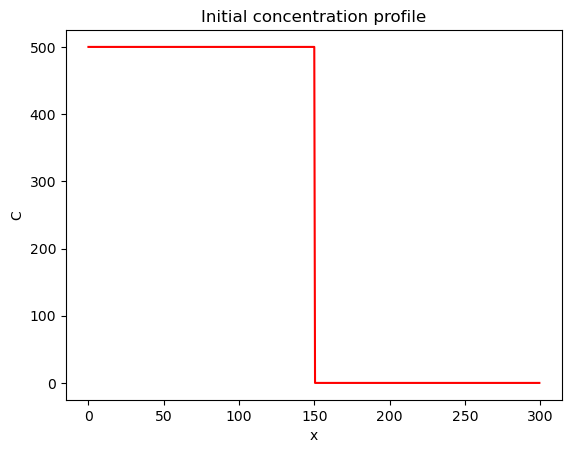

In [18]:
plt.figure()
plt.plot(x, C, "r")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Initial concentration profile")

Set the start time of the model and the number of time steps. Calculate a stable time step for the model using a stability criterion.

In [21]:
time = 0
nt =5000
dt = 0.5 * (dx**2 / D)

In [22]:
dt

0.00125

In [24]:
z = 5

In [25]:
z = z + 5
z

10

In [26]:
z += 5
z

15

Loop over the time steps of the model, solving the diffusion equation using the FTCS explicit scheme
described above.
The boundary conditions are fixed, so reset them at each time step.

In [33]:
for t in range (0, nt):
    C += D * dt / dx**2 * (np.roll(C, -1) - 2*C + np.roll(C, 1))
    C[0] = C_left
    C[-1] = C_right

Plot the result. 

Text(0.5, 1.0, 'Final concentration profile')

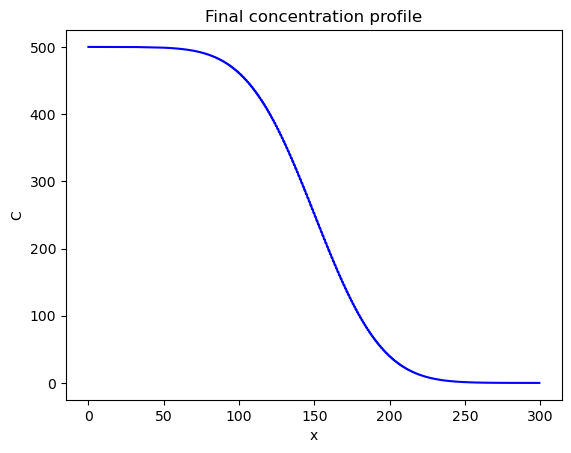

In [35]:
plt.figure()
plt.plot(x, C, "b")
plt.xlabel("x")
plt.ylabel("C")
plt.title("Final concentration profile")